<a href="https://colab.research.google.com/github/sakshipagaria/Data-science-Machine-Learning/blob/main/ML_LAB3A_T2_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3A : IMPLEMENTATION OF SIMPLE LINEAR REGRESSION 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/content/Salary.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory data analysis

In [6]:
dataset.shape

(30, 2)

In [7]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Data Pre-processing

### Extracting dependent and independent variable

In [10]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [11]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


### Splitting data into training and testing

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 25)

In [27]:
print(X_train)

[[ 3.9]
 [ 4.5]
 [ 1.1]
 [ 3. ]
 [ 9. ]
 [ 4.1]
 [ 7.1]
 [ 5.1]
 [ 5.3]
 [10.3]
 [ 2. ]
 [ 3.2]
 [ 1.3]
 [ 2.9]
 [ 6.8]
 [10.5]
 [ 3.2]
 [ 5.9]
 [ 4. ]
 [ 8.2]
 [ 7.9]
 [ 4.9]
 [ 9.5]
 [ 2.2]]


In [28]:
print(X_test)

[[6. ]
 [4. ]
 [1.5]
 [3.7]
 [8.7]
 [9.6]]


In [29]:
print(Y_train)

[ 63218.  61111.  39343.  60150. 105582.  57081.  98273.  66029.  83088.
 122391.  43525.  54445.  46205.  56642.  91738. 121872.  64445.  81363.
  56957. 113812. 101302.  67938. 116969.  39891.]


In [30]:
print(Y_test)

[ 93940.  55794.  37731.  57189. 109431. 112635.]


## Build simple linear regression model 

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [32]:
#check the attributes of our model
print("B1 =",reg.coef_)
print("B0 =",reg.intercept_)

B1 = [9339.90339715]
B0 = 26561.50676242527


In [33]:
#accuracy of model
print("Accuracy of model = ",reg.score(X_train,Y_train))

Accuracy of model =  0.9577907749872991


In [34]:
#predicting testing data
yhat = reg.predict(X_test)
print(yhat)

[ 82600.92714535  63921.12035104  40571.36185816  61119.1493319
 107818.66631767 116224.57937511]


In [35]:
print(Y_test)
print(yhat)

[ 93940.  55794.  37731.  57189. 109431. 112635.]
[ 82600.92714535  63921.12035104  40571.36185816  61119.1493319
 107818.66631767 116224.57937511]


In [36]:
#predict the salary for person having 11 years of experience
reg.predict([[11]])

array([129300.44413113])

In [37]:
24674.16+11*9629.65

130600.31

### Visualizing Training Data

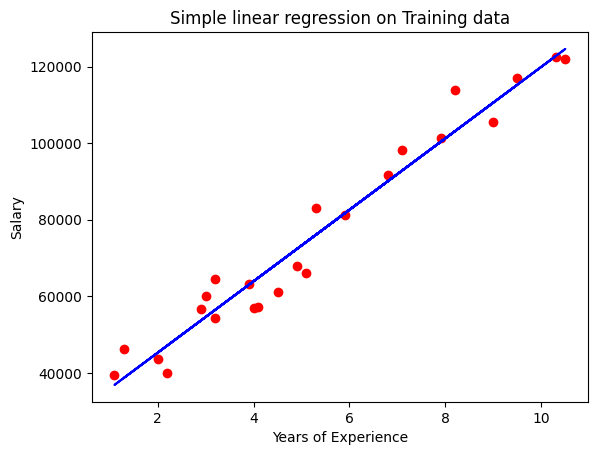

In [38]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("Simple linear regression on Training data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Visualizing Testing Data

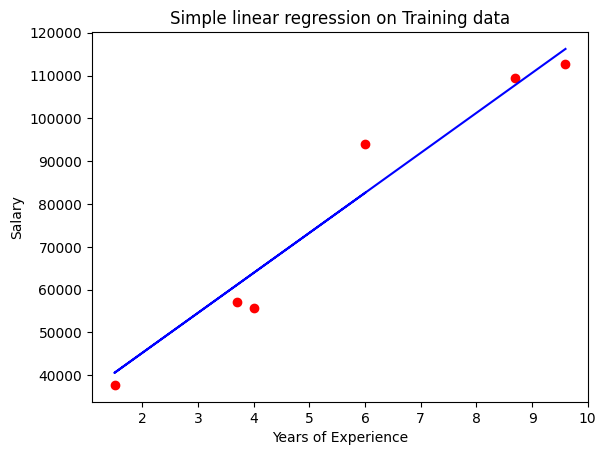

In [39]:
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_test,reg.predict(X_test),color='blue')
plt.title("Simple linear regression on Training data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Evaluating a Model using R2(goodness of fit) metric

In [49]:
from sklearn.metrics import r2_score
r2_score(Y_test,yhat)

0.9531732818427658

In [56]:
#trainning accuracy
print("Training accuracy: ",reg.score(X_train,Y_train))
#testing accuracy 
print("Testing accuracy: ",reg.score(X_test,Y_test))

Training accuracy:  0.9577907749872991
Testing accuracy:  0.9531732818427658
